# 学习目标

1. 从数学原理到项目实战
    - XGBoost参数调优需要了解模型基本原理
    - 参照Kaggle竞赛任务进行讲解

2. 举一反三，可以更快更好学习其他机器学习模型
    - 从机器学习模型的一般原理，到XGBoost的特别之处

# XGBoost
1. XGBoost：eXtreme Gradient Boosting
    - 应用机器学习领域一个强有力的工具
    - Gradient Boosting Machine（GBM）的优化实现、快速有效
2. 很多数据柯旭竞赛中取得了很好的成绩
    - Rank 1，KDD Cup 2016 Competition
    - Rank 1,Dato Truly Native(Kaggle)
    - Rank1 CERN LHCb Experiment Flavor of Physics Competion

#  环境准备
1. Python环境：python3.6
2. Python工具包:
    - 科学计算（numpy,SciPy,pandas）,机器学习（scikit-learn）、图形绘制（matplotlib）
    - Anaconda,集成了上面所有的环境
    - Jupyter NoteBook
3. XGBoost安装
4. graphviz 安装（可选）
    - 可视化工具包，显示树结构

# 第一讲：初识XGBoost

## XGBoost
- XGBoost：eXtreme Gradient Boosting
- Gradient Boosting Machines(GBM) 的C++优化实现，快速有效

–深盟分布式机器学习开源平台(Distributed Machine Learning Community， DMLC)的一个分支

–DMLC也开包含流行的深度学习库mxnet

The name xgboost, though, actually refers to the engineering goal to
push the limit of computations resources for boosted tree algorithms.
Which is the reason why many people use xgboost.

## Gradient Boosting Machines
- Machines：机器学习模型
– 对数据的产生规律建模
- Boosting Machines
– 弱学习器组合成强学习器／模型
- Gradient Boosting Machines
– 根据梯度下降方式组合弱学习器

## 与XGBoost的第一次亲密接触

![](https://upload-images.jianshu.io/upload_images/1531909-7205a4b46048e54f.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/700)

## 确定任务
    - 数据集：UCI机器学习库的Mushroom 数据集(XGBoost安装包中的demo数据)
    - 任务：根据蘑菇的22个特征判断蘑菇是否有毒
    - 总样本数：8124
        - 可食用：4208，51.8%
        - 有毒：3916，48.2%
        - 训练样本：6513
        - 测试样本：1611
    - 特征：Demo中22维特征经过处理，变成了126维特征量

    – xgboost/demo/data/featmap.txt 文件中有特征映射说明

    http://archive.ics.uci.edu/ml/machine-learning-databases/mushroo/

# 1_Mushroom_baseline

## 导入必要的工具包

In [3]:
import xgboost as xgb
# 计算分类正确率
from sklearn.metrics import accuracy_score

## 数据读取
XGBoost可以加载libsvm格式的文本数据，libsvm的文件格式（稀疏特征）如下：

1 101:1.2 102:0.03

0 1:2.1 10001:300 10002:400
...

每一行表示一个样本，第一行的开头的“1”是样本的标签。“101”和“102”为特征索引，'1.2'和'0.03' 为特征的值。
在两类分类中，用“1”表示正样本，用“0” 表示负样本。也支持[0,1]表示概率用来做标签，表示为正样本的概率。

下面的示例数据需要我们通过一些蘑菇的若干属性判断这个品种是否有毒。
UCI数据描述：http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/ ，
每个样本描述了蘑菇的22个属性，比如形状、气味等等（将22维原始特征用加工后变成了126维特征，
并存为libsvm格式)，然后给出了这个蘑菇是否可食用。其中6513个样本做训练，1611个样本做测试。

XGBoost加载的数据存储在对象DMatrix中
XGBoost自定义了一个数据矩阵类DMatrix，优化了存储和运算速度
DMatrix文档：http://xgboost.readthedocs.io/en/latest/python/python_api.html

In [5]:
# read in data
my_workpath = 'files/data/python58-data/'
dtrain = xgb.DMatrix(my_workpath+'agaricus.txt.train')
dtest = xgb.DMatrix(my_workpath+'agaricus.txt.test')

查看数据情况

In [7]:
dtrain.num_col()

127

In [9]:
dtrain.num_row()

6513

In [11]:
dtest.num_row()

1611

## 训练参数设置

- max_depth： 树的最大深度。缺省值为6，取值范围为：[1,∞]
- eta：为了防止过拟合，更新过程中用到的收缩步长。在每次提升计算之后，算法会直接获得新特征的权重。 
 eta通过缩减特征的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
- silent：取0时表示打印出运行时信息，取1时表示以缄默方式运行，不打印运行时信息。缺省值为0
- objective： 定义学习任务及相应的学习目标，“binary:logistic” 表示二分类的逻辑回归问题，输出为概率。

- 其他参数取默认值。

In [13]:
# 设置参数
param={'max_depth':2,'eta':1,'silent':0,'objective':'binary:logistic'}
param

{'eta': 1, 'max_depth': 2, 'objective': 'binary:logistic', 'silent': 0}

## 训练模型

In [22]:
# 设置boosting迭代计算次数
num_round = 2

# 开始时间
import time
start_time = time.clock()

# 训练模型
bst = xgb.train(params=param,dtrain=dtrain,num_boost_round= num_round)

# 结束时间
end_time = time.clock()
print(end_time-start_time)

0.022146545997031808


查看模型在训练集上的分类性能

XGBoost预测的输出是概率。这里蘑菇分类是一个二类分类问题，输出值是样本为第一类的概率。 我们需要将概率值转换为0或1。

In [24]:
train_preds = bst.predict(dtrain)
train_predictions = [round(value) for value in train_preds]
y_train = dtrain.get_label()
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy %.2f%%" % (train_accuracy*100.00))

Train Accuracy 97.77%


## 测试
模型训练好后，可以用训练好的模型对测试数据进行预测

In [26]:
# make predictions
preds=bst.predict(dtest)
preds

array([0.28583017, 0.9239239 , 0.28583017, ..., 0.9239239 , 0.05169873,
       0.9239239 ], dtype=float32)

检查模型在测试集上的正确率
XGBoost预测的输出是概率，输出值是样本为第一类的概率。我们需要将概率值转换为0或1。

In [27]:
predictions=[round(value) for value in preds]

In [28]:
y_test=dtest.get_label()
test_accuracy=accuracy_score(y_test,predictions)
print("Test Accuracy %.2f%%" % (test_accuracy*100.00))

Test Accuracy 97.83%


## 模型可视化
调用XGBoost工具包中的plot_tree，在显示 要可视化模型需要安装graphviz软件包（请见预备0）

plot_tree（）的三个参数：

模型
树的索引，从0开始
显示方向，缺省为竖直，‘LR'是水平方向

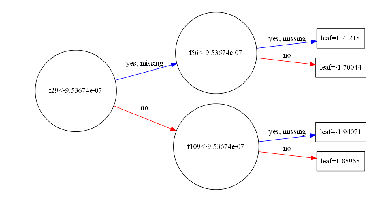

In [30]:
from matplotlib import pyplot
import graphviz
xgb.plot_tree(bst, num_trees=0, rankdir= 'LR' )
pyplot.show()
#xgb.plot_tree(bst,num_trees=1, rankdir= 'LR' )
#pyplot.show()
#xgb.to_graphviz(bst,num_trees=0)
#xgb.to_graphviz(bst,num_trees=1)